# Project: Improving Relational Language Understanding in Intelligent Virtual Agents (IVAs)

## INTRODUCTION

Customer service interactions play a pivotal role in user experience. This project aims to enhance the understanding of relational strategies in customer service by analyzing the RSiCS dataset. Additionally, a rule-based chatbot will be integrated to facilitate enhanced user interaction.

## BUSINESS UNDERSTANDING

In today's digital landscape, customer service interactions are increasingly handled by Intelligent Virtual Agents (IVAs), automated systems designed to assist customers with their inquiries. However, many IVAs struggle to effectively understand and respond to the relational aspects of these interactions, such as greetings, backstory, and emotions. Developing a deeper understanding of relational language is crucial for IVAs to provide personalized and empathetic customer experiences, which are essential for fostering positive customer relationships and enhancing satisfaction. Despite the growing reliance on IVAs in customer service, there remains a lack of comprehensive datasets and methodologies for training and evaluating IVAs on relational language comprehension and response generation, posing a significant challenge in improving the quality of customer service in the digital age.

### PROBLEM STATEMENT

Existing Intelligent Virtual Agents (IVAs) often fail to interpret and respond appropriately to relational language cues in customer interactions, leading to suboptimal customer experiences and decreased satisfaction levels. This limitation impedes IVAs' ability to build rapport with customers, address their needs effectively, and cultivate positive relationships. Consequently, there is a pressing need to develop methodologies and tools that enable IVAs to accurately comprehend and respond to relational language cues, thereby improving the quality of customer service interactions and enhancing overall customer satisfaction.

### OBJECTIVE

The objective of this project is to bridge the gap in Intelligent Virtual Agents' (IVAs) ability to understand and respond to relational language cues in customer interactions. By leveraging a comprehensive dataset sourced from three live customer service IVAs operating in the domains of travel and telecommunications, annotated with relational language cues, the aim is to develop and evaluate methodologies for training and enhancing IVAs' relational language comprehension and response generation capabilities. Ultimately, the goal is to empower IVAs to provide more personalized, empathetic, and effective customer service experiences, thereby improving customer satisfaction and loyalty.

### SOURCE OF DATA

### RSiCS Dataset Overview

#### 1. Source of Data
The RSiCS dataset was collected from commercial customer service IVAs and the TripAdvisor airline forum ([source](https://nextit-public.s3-us-west-2.amazonaws.com/rsics.html)).

#### 2. Data Contents and Formatting:

1. **x_y_align.csv**
  - captures alignment and agreement metrics between Annotator A (x) and Annotator B in a group for specific requests.

2. **all_data_by_threshold.csv**:
   - Merges selections and determines user intentions.

3. **tagged_selections_by_sentence.csv**:
   - Identifies relational language in user requests.

4. **all_multi_intent.csv**:
   - Flags requests with multiple intentions for intent detection strategies.

#### 3. Feature Information (Columns):

**x_y_align.csv:**

- **Annotator A ID:** x
- **Annotator B ID:** Annotator that the alignment score with x is calculated against.
- **Group ID:** The group of 4 annotators that the compared users belong to.
- **Dataset ID:** Dataset y that the request originated from.
- **Request ID:** Unique ID of a request to allow joining between different files.
- **Text:** The original request text.
- **Annotator A Text:** The request text with selections from annotator A contained within [ and ].
- **Annotator B Text:** The request text with selections from annotator B contained within [ and ].
- **Length:** The character length (n) of the original request text in column 6.
- **Error:** The number of character positions (e) where the binary determination of A and B do not agree.
- **Alignment Score:** The alignment as calculated by align = (n - e) / n.
- **Agreement:** Whether or not A and B agree that any selection is necessary.


##### all_data_by_threshold.csv
- **Dataset ID**: Origin dataset identifier.
- **Group ID**: Annotator group identifier.
- **Request ID**: Unique request identifier.
- **MultiIntent**: Flag for multiple user intentions.
- **Threshold**: Selection merging threshold.
- **MergedSelections**: Merged selections by threshold.
- **Unselected**: Unselected text.
- **Selected**: Selected text.
- **Removed**: Length of removed text.

##### tagged_selections_by_sentence.csv
- **Dataset ID**: Origin dataset identifier.
- **Group ID**: Annotator group identifier.
- **Request ID**: Unique request identifier.
- **Threshold**: Selection merging threshold.
- **MergedSelections**: Merged selections by threshold.
- **Unselected**: Unselected text.
- **Selected**: Selected text.
- **Greeting**: Presence of greeting.
- **Backstory**: Presence of self-exposure language.
- **Justification**: Presence of justification language.
- **Rant**: Presence of ranting language.
- **Gratitude**: Presence of gratitude expressions.
- **Other**: Presence of additional information.
- **Express Emotion**: Presence of emotional language.

##### all_multi_intent.csv
- **Dataset ID**: Origin dataset identifier.
- **Group ID**: Annotator group identifier.
- **Request ID**: Unique request identifier.
- **Text**: Original request text.
- **Annotator x**: Binary flag for annotator x's belief in multiple intents.

### Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Data Understanding


### Load and Explore Datasets


In [2]:
def load_datasets():
    # Replace these file paths with the actual paths to your CSV files
    file_paths = [
        'x_y_align.csv',
        'all_data_by_threshold.csv',
        'tagged_selections_by_sentence.csv',
        'all_multi_intent.csv'
    ]

    # Create a dictionary to store the loaded datasets
    datasets = {file_path.split('.')[0]: pd.read_csv(file_path) for file_path in file_paths}

    return datasets

def explore_datasets(datasets):
    for name, df in datasets.items():
        print(f"\n{name} DataFrame:")
        # Print the first 5 rows
        print("Head of the DataFrame:")
        print(df.head())

        # Print the shape of the DataFrame
        print("\nShape of the DataFrame:", df.shape)

        # Print summary statistics
        print("\nSummary statistics of the DataFrame:")
        print(df.describe())

        # Print information about the DataFrame
        print("\nInformation about the DataFrame:")
        print(df.info())

# Load datasets
loaded_datasets = load_datasets()

# Explore datasets
explore_datasets(loaded_datasets)




x_y_align DataFrame:
Head of the DataFrame:
  Annotator A ID  Annotator B ID  Parition ID  Corpora ID  Sentence ID  \
0              1             7.0          2.0         1.0       6507.0   
1              1             7.0          2.0         1.0       6508.0   
2              1             7.0          2.0         1.0       6509.0   
3              1             7.0          2.0         1.0       6514.0   
4              1             7.0          2.0         1.0       6518.0   

                                                Text  \
0  What advantage is there in booking directly wi...   
1  Hi, Could someone please confirm if CX 884 - H...   
2  I will be transiting Dubai soon en route to Oz...   
3  Does anyone know where I'd find estimated pric...   
4  It's from BA and finds the cheapest BA flight ...   

                                    Annotator A Text  \
0  What advantage is there in booking directly wi...   
1  [Hi, ]Could someone please confirm if CX 884 -...   
2  [I

# Data Cleaning And Preprocessing

####  Data Quality Checks for x_y_align Dataset


In [3]:
def load_datasets():
    # Replace this file path with the actual path to your CSV file
    file_path = 'x_y_align.csv'

    # Read the CSV file directly
    df = pd.read_csv(file_path)

    # Create a dictionary to store the loaded dataset
    datasets = {'x_y_align': df}

    return datasets

def explore_datasets(datasets):
    for name, df in datasets.items():
        print(f"\n{name} DataFrame:")
        # Print the first 5 rows
        print("Head of the DataFrame:")
        print(df.head())

        # Print the shape of the DataFrame
        print("\nShape of the DataFrame:", df.shape)

        # Print summary statistics
        print("\nSummary statistics of the DataFrame:")
        print(df.describe())

        # Print information about the DataFrame
        print("\nInformation about the DataFrame:")
        print(df.info())

# Load datasets
loaded_datasets = load_datasets()

# Explore datasets
explore_datasets(loaded_datasets)



x_y_align DataFrame:
Head of the DataFrame:
  Annotator A ID  Annotator B ID  Parition ID  Corpora ID  Sentence ID  \
0              1             7.0          2.0         1.0       6507.0   
1              1             7.0          2.0         1.0       6508.0   
2              1             7.0          2.0         1.0       6509.0   
3              1             7.0          2.0         1.0       6514.0   
4              1             7.0          2.0         1.0       6518.0   

                                                Text  \
0  What advantage is there in booking directly wi...   
1  Hi, Could someone please confirm if CX 884 - H...   
2  I will be transiting Dubai soon en route to Oz...   
3  Does anyone know where I'd find estimated pric...   
4  It's from BA and finds the cheapest BA flight ...   

                                    Annotator A Text  \
0  What advantage is there in booking directly wi...   
1  [Hi, ]Could someone please confirm if CX 884 -...   
2  [I

In [4]:
def load_datasets():
    # Replace this file path with the actual path to your CSV file
    file_path = 'x_y_align.csv'

    # Read the CSV file directly without printing anything
    df = pd.read_csv(file_path)

    return df

def print_missing_values_and_duplicates(df):
    # Print number of missing values
    print("Number of missing values in each column:")
    print(df.isnull().sum())

    # Print number of duplicates
    print("\nNumber of duplicates:", df.duplicated().sum())

# Load the dataset
df = load_datasets()

# Print only the number of missing values and duplicates
print_missing_values_and_duplicates(df)


Number of missing values in each column:
Annotator A ID       32
Annotator B ID       32
Parition ID         160
Corpora ID          160
Sentence ID         160
Text                160
Annotator A Text    160
Annotator B Text    160
Length              160
Error               160
Alignment Score     160
Agreement           160
dtype: int64

Number of duplicates: 55


1. x_y_align Dataset: Missing values detected in multiple columns, 55 duplicate rows, and outliers observed in Annotator B ID, Length, Error, and Alignment Score.



#### Drop Missing Values and Duplicates



In [5]:
def load_datasets():
    # Replace this file path with the actual path to your CSV file
    file_path = 'x_y_align.csv'

    # Read the CSV file directly
    df = pd.read_csv(file_path)

    return df

def clean_dataset(df):
    # Drop missing values
    df_cleaned = df.dropna()

    # Drop duplicates
    df_cleaned = df_cleaned.drop_duplicates()

    return df_cleaned

# Load the dataset
df = load_datasets()

# Clean the dataset
df_cleaned = clean_dataset(df)

# Print the shape of the cleaned dataset
print("Shape of the cleaned dataset:", df_cleaned.shape)



Shape of the cleaned dataset: (81108, 12)


#### Data Quality Checks for All Data by Threshold, Tagged Selections by Sentence, and All Multi-Intent Datasets

In [6]:
def load_datasets():
    try:
        # Load datasets
        all_data_by_threshold_df = pd.read_csv('all_data_by_threshold.csv')
        tagged_selections_df = pd.read_csv('tagged_selections_by_sentence.csv')
        all_multi_intent_df = pd.read_csv('all_multi_intent.csv')
        
        return all_data_by_threshold_df, tagged_selections_df, all_multi_intent_df
    
    except FileNotFoundError as e:
        print(f"Error: {e}. Please make sure the file paths are correct.")

# Call the function to load datasets
all_data, tagged_selections, all_multi_intent = load_datasets()


In [7]:
def load_datasets():
    try:
        # Load datasets
        all_data_by_threshold_df = pd.read_csv('all_data_by_threshold.csv')
        tagged_selections_df = pd.read_csv('tagged_selections_by_sentence.csv')
        all_multi_intent_df = pd.read_csv('all_multi_intent.csv')
        
        return all_data_by_threshold_df, tagged_selections_df, all_multi_intent_df
    
    except FileNotFoundError as e:
        print(f"Error: {e}. Please make sure the file paths are correct.")

# Call the function to load datasets
all_data, tagged_selections, all_multi_intent = load_datasets()

# Print the size of each dataset
print("Size of all_data_by_threshold_df:", all_data.shape)
print("Size of tagged_selections_df:", tagged_selections.shape)
print("Size of all_multi_intent_df:", all_multi_intent.shape)


Size of all_data_by_threshold_df: (32000, 9)
Size of tagged_selections_df: (6759, 14)
Size of all_multi_intent_df: (1241, 12)


In [8]:
def load_datasets():
    try:
        # Load datasets
        all_data_by_threshold_df = pd.read_csv('all_data_by_threshold.csv')
        tagged_selections_df = pd.read_csv('tagged_selections_by_sentence.csv')
        all_multi_intent_df = pd.read_csv('all_multi_intent.csv')
        
        return all_data_by_threshold_df, tagged_selections_df, all_multi_intent_df
    
    except FileNotFoundError as e:
        print(f"Error: {e}. Please make sure the file paths are correct.")

def print_data_info(df, name):
    print(f"\nInfo for {name} dataset:")
    print("Number of missing values:")
    print(df.isnull().sum())
    
    print("\nNumber of outliers:")
    # You can add your outlier detection logic here
    
    print("\nNumber of duplicates:")
    print(df.duplicated().sum())

# Call the function to load datasets
all_data, tagged_selections, all_multi_intent = load_datasets()

# Print information for each dataset
print_data_info(all_data, 'all_data_by_threshold')
print_data_info(tagged_selections, 'tagged_selections_by_sentence')
print_data_info(all_multi_intent, 'all_multi_intent')




Info for all_data_by_threshold dataset:
Number of missing values:
Dataset ID              0
Group ID                0
Request ID              0
MultiIntent             0
Threshold               0
MergedSelections        0
Unselected            798
Selected            17087
Removed                 0
dtype: int64

Number of outliers:

Number of duplicates:
0

Info for tagged_selections_by_sentence dataset:
Number of missing values:
Dataset                0
Partition              0
SentenceID             0
Threshold              0
MergedSelections       0
Unselected            34
Selected            2969
Greeting               0
Backstory              0
Justification          0
Rant                   0
Gratitude              0
Other                  0
Express Emotion        0
dtype: int64

Number of outliers:

Number of duplicates:
0

Info for all_multi_intent dataset:
Number of missing values:
Dataset ID     0
Group ID       0
Request ID     0
Text           0
Annotator 1    0
Annotator

#### "Dropping 'Unselected' and 'Selected' Columns"







In [9]:
# Load datasets
all_data_by_threshold_df = pd.read_csv('all_data_by_threshold.csv')
tagged_selections_df = pd.read_csv('tagged_selections_by_sentence.csv')

# Function to drop columns with missing values and print the updated columns
def drop_columns(df, columns_to_drop, dataset_name):
    df.drop(columns=columns_to_drop, inplace=True)  # Corrected 'axis' to 'columns'
    print(f"Columns after dropping {', '.join(columns_to_drop)} in {dataset_name} dataset:")
    print(df.columns)

# Drop columns for all_data_by_threshold dataset
drop_columns(all_data_by_threshold_df, ['Unselected', 'Selected'], 'all_data_by_threshold')

# Drop columns for tagged_selections_by_sentence dataset
drop_columns(tagged_selections_df, ['Unselected', 'Selected'], 'tagged_selections_by_sentence')



Columns after dropping Unselected, Selected in all_data_by_threshold dataset:
Index(['Dataset ID', 'Group ID', 'Request ID', 'MultiIntent', 'Threshold',
       'MergedSelections', 'Removed'],
      dtype='object')
Columns after dropping Unselected, Selected in tagged_selections_by_sentence dataset:
Index(['Dataset', 'Partition', 'SentenceID', 'Threshold', 'MergedSelections',
       'Greeting', 'Backstory', 'Justification', 'Rant', 'Gratitude', 'Other',
       'Express Emotion'],
      dtype='object')


### "Dataset Merge Operation"

#### 'all_data_by_threshold_df' and 'all_multi_intent' 






In [10]:
# Define the merged keys
merge_keys = ['Dataset ID', 'Group ID', 'Request ID']

merged_df = pd.merge(all_data, all_multi_intent, on=merge_keys, how='outer')

# Check the shape of the merged DataFrame
print("Shape of merged DataFrame:", merged_df.shape)









Shape of merged DataFrame: (32000, 18)


#### 'merged_df' and  'df_cleaned' 

In [11]:
merged_df = pd.merge(merged_df, df_cleaned, on='Text', how='outer', suffixes=('_all_data', '_df_cleaned'))

# Check the shape of the merged DataFrame
print("Shape of merged DataFrame:", merged_df.shape)



Shape of merged DataFrame: (113268, 29)


#### 'merged_df' and 'tagged_selections_df' 

In [12]:
# Columns to use for the merge
merge_columns = ['MergedSelections', 'Threshold']

# Merge the datasets using outer join on common columns
merged_outer_df = pd.merge(merged_df, tagged_selections_df,
                           left_on=merge_columns, right_on=merge_columns, how='outer', suffixes=('_merged', '_tagged'))

# Check the shape of the merged DataFrame
print("Shape of merged DataFrame (outer join):", merged_outer_df.shape)

Shape of merged DataFrame (outer join): (117284, 39)


#### Removing Duplicates in the 'Text' Column of Merged DataFrame

In [13]:
# Drop duplicates based on the "Text" column
merged_outer_df.drop_duplicates(subset='Text', inplace=True)

# Print the shape of the dataset after dropping duplicates
print("Shape of the dataset after dropping duplicates:", merged_outer_df.shape)

# Print the first few rows of the dataset to verify
print("First few rows of the dataset after dropping duplicates:")
print(merged_outer_df.head())


Shape of the dataset after dropping duplicates: (7813, 39)
First few rows of the dataset after dropping duplicates:
       Dataset ID  Group ID  Request ID  MultiIntent  Threshold  \
0             1.0       1.0      1483.0          0.0        1.0   
5740          2.0       2.0      7678.0          1.0        4.0   
26200         4.0       2.0      9547.0          1.0        2.0   
28697         4.0       1.0      5836.0          1.0        2.0   
31112         1.0       1.0      1902.0          1.0        1.0   

                                        MergedSelections  \
0      [Today Ellemay wrote: “I however, like Qantas ...   
5740   I have a disability and want a round trip tick...   
26200  we are moving and I need to get the new addres...   
28697  why am i unable to connect with my user name a...   
31112  [Hi all, I posted a couple of days ago asking ...   

                                              Unselected  \
0      I would really like to know the criteria which...   


In [14]:
# Print the shape of the dataset after dropping duplicates
print("Shape of the dataset after dropping duplicates:", merged_outer_df.shape)


Shape of the dataset after dropping duplicates: (7813, 39)


In [15]:
# Print the names of the columns
print("Names of the columns:")
print(merged_outer_df.columns)


Names of the columns:
Index(['Dataset ID', 'Group ID', 'Request ID', 'MultiIntent', 'Threshold',
       'MergedSelections', 'Unselected', 'Selected', 'Removed', 'Text',
       'Annotator 1', 'Annotator 2', 'Annotator 3', 'Annotator 4',
       'Annotator 5', 'Annotator 6', 'Annotator 7', 'Annotator 8',
       'Annotator A ID', 'Annotator B ID', 'Parition ID', 'Corpora ID',
       'Sentence ID', 'Annotator A Text', 'Annotator B Text', 'Length',
       'Error', 'Alignment Score', 'Agreement', 'Dataset', 'Partition',
       'SentenceID', 'Greeting', 'Backstory', 'Justification', 'Rant',
       'Gratitude', 'Other', 'Express Emotion'],
      dtype='object')


# Feature Selection

**Key Columns Overview:**

In the context of the IVA, several key columns play crucial roles in understanding, organizing, and processing user requests. These columns encompass identification, user input, annotated selections, alignment information, agreement indicators, language class annotations, missing value identifiers, and alignment/quality metrics.

**Identification and Context:**
- `Dataset ID`: Helps in understanding the source or domain of the request.
- `Request ID`: Unique identifier for individual requests, aiding in organization and tracking.

**User Input:**
- `Text`: Original user requests serve as input for IVA understanding.

**Annotated Selections:**
- `MergedSelections`: Annotated selections by annotators, marking potentially unnecessary parts in user requests.

**Alignment Information:**
- `Alignment Score`: Indicates the alignment between annotators, providing insights into agreement or disagreement.

**Agreement Indicator:**
- `Agreement`: Binary indicator of whether annotators agree on the necessity of any selection.

**Language Class Annotations:**
- `Greeting`, `Backstory`, `Justification`, `Rant`, `Gratitude`, `Other`, `Express Emotion`: Provide information about the nature of language in the highlighted sections, helping in understanding user sentiment and context.

**Alignment and Quality Metrics:**
- `Length`: Character length of the original request, useful for context and analysis.
- `Error`: Number of character positions where annotators disagree, highlighting potential areas for improvement in training data quality.



In [16]:
# Select the desired columns
selected_columns = ['Dataset ID', 'Request ID', 'Text', 'MergedSelections',
                    'Alignment Score', 'Agreement', 'Greeting', 'Backstory',
                    'Justification', 'Rant', 'Gratitude', 'Other', 'Express Emotion',
                    'Length', 'Error']

# Subset the DataFrame with the selected columns
selected_df = merged_outer_df[selected_columns]

# Display the selected DataFrame
print(selected_df)



        Dataset ID  Request ID  \
0              1.0      1483.0   
5740           2.0      7678.0   
26200          4.0      9547.0   
28697          4.0      5836.0   
31112          1.0      1902.0   
...            ...         ...   
117224         NaN         NaN   
117236         NaN         NaN   
117248         NaN         NaN   
117260         NaN         NaN   
117272         NaN         NaN   

                                                     Text  \
0                                                     NaN   
5740    I have a disability and want a round trip tick...   
26200   we are moving and I need to get the new addres...   
28697   why am i unable to connect with my user name a...   
31112   Hi all, I posted a couple of days ago asking f...   
...                                                   ...   
117224  I received a 20 credit for my bill but can't a...   
117236  I am watching on demand and in the middle of a...   
117248  Why does the balance on this page 

##### DataFrame Copy Creation

In [17]:
selected_df_copy = selected_df


#### NaN Values in 'Text' Column 

In [18]:
selected_df_copy.dropna(subset=['Text'], inplace=True)


C:\Users\pc\AppData\Local\Temp\ipykernel_6228\3831745982.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df_copy.dropna(subset=['Text'], inplace=True)


In [19]:
nan_text_count = selected_df_copy['Text'].isnull().sum()
print("NaN count in the 'Text' column:", nan_text_count)


NaN count in the 'Text' column: 0


#### Special Tokens for Missing Values in 'MergedSelections' Column

In [20]:
selected_df_copy = selected_df[selected_columns].copy()

# Replace empty strings with special tokens in the 'MergedSelections' column
selected_df.loc[selected_df['MergedSelections'].isna(), 'MergedSelections'] = '<UNK>'


#### Missing Values for Dataset Identification Columns

In [21]:
# Create a copy of the DataFrame
selected_df_copy = selected_df.copy()

# Fill NaN values in 'Dataset ID' and 'Request ID' with unique identifiers
max_dataset_id = selected_df_copy['Dataset ID'].max()
max_request_id = selected_df_copy['Request ID'].max()
selected_df_copy['Dataset ID'] = selected_df_copy['Dataset ID'].fillna(max_dataset_id + 1)
selected_df_copy['Request ID'] = selected_df_copy['Request ID'].fillna(max_request_id + 1)

# Check for NaNs in the modified DataFrame
nan_dataset_id = selected_df_copy['Dataset ID'].isna().sum()
nan_request_id = selected_df_copy['Request ID'].isna().sum()

print("Number of NaNs in 'Dataset ID':", nan_dataset_id)
print("Number of NaNs in 'Request ID':", nan_request_id)



Number of NaNs in 'Dataset ID': 0
Number of NaNs in 'Request ID': 0


#### Fill missing values with -1 for binary columns

In [22]:
# List of columns to fill missing values with -1
columns_to_fill = ['Agreement', 'Backstory', 'Other']

# Fill missing values with -1
selected_df_copy[columns_to_fill] = selected_df_copy[columns_to_fill].fillna(-1)




In [23]:
# Columns to fill NaN values with -1
columns_to_fill = ['Greeting', 'Justification', 'Rant', 'Gratitude', 'Express Emotion']

# Fill NaN values with -1 in the selected DataFrame copy
selected_df_copy[columns_to_fill] = selected_df_copy[columns_to_fill].fillna(-1)


#### Median for Numerical Columns

In [24]:
# Calculate the median for each column
alignment_score_median = selected_df_copy['Alignment Score'].median()
length_median = selected_df_copy['Length'].median()
error_median = selected_df_copy['Error'].median()

# Fill NaN values with the respective medians
selected_df_copy['Alignment Score'].fillna(alignment_score_median, inplace=True)
selected_df_copy['Length'].fillna(length_median, inplace=True)
selected_df_copy['Error'].fillna(error_median, inplace=True)



In [25]:
nan_count_total = selected_df_copy.isnull().sum().sum()
if nan_count_total > 0:
    print("There are NaN values in the dataset.")
    print("Total NaN count:", nan_count_total)
else:
    print("There are no NaN values in the dataset.")


There are no NaN values in the dataset.


In [26]:
num_rows, num_columns = selected_df_copy.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)


Number of rows: 7812
Number of columns: 15


# Exploratory Data Analysis

### Word Cloud of Text Data

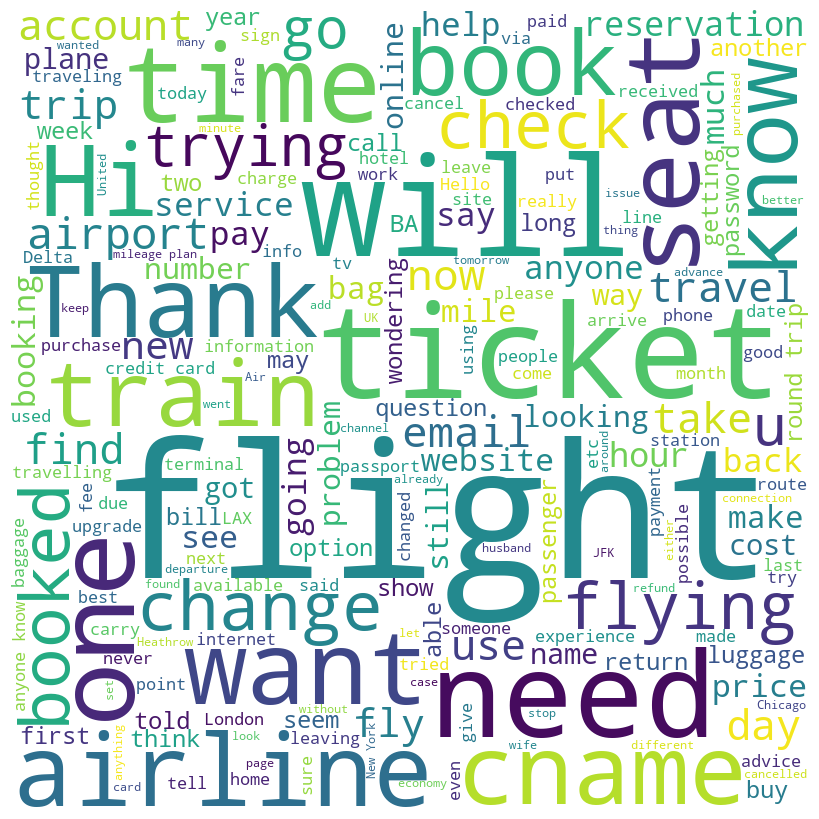

In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Remove NaN values from the text data
text_data_cleaned = selected_df_copy['Text'].dropna()

# Combine text data into a single string
text_combined = ' '.join(text_data_cleaned)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=800, 
                      background_color='white', 
                      stopwords=None, 
                      min_font_size=10).generate(text_combined)

# Plot the word cloud
plt.figure(figsize=(8, 8), facecolor=None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad=0) 
  
plt.show()


The text data is majorly related to travel or airline:

1. The most frequent phrase or combination of words is "hour layover", appearing 243,324 times in the text data.

2. The words "will", "password", and "US Airways" each appear 162,216 times, indicating their significant presence in the text.

3. Other notable words include "know", "download", "app", "sent", "flight", and "messages", each appearing 81,108 times.


### Visualising the numerical columns

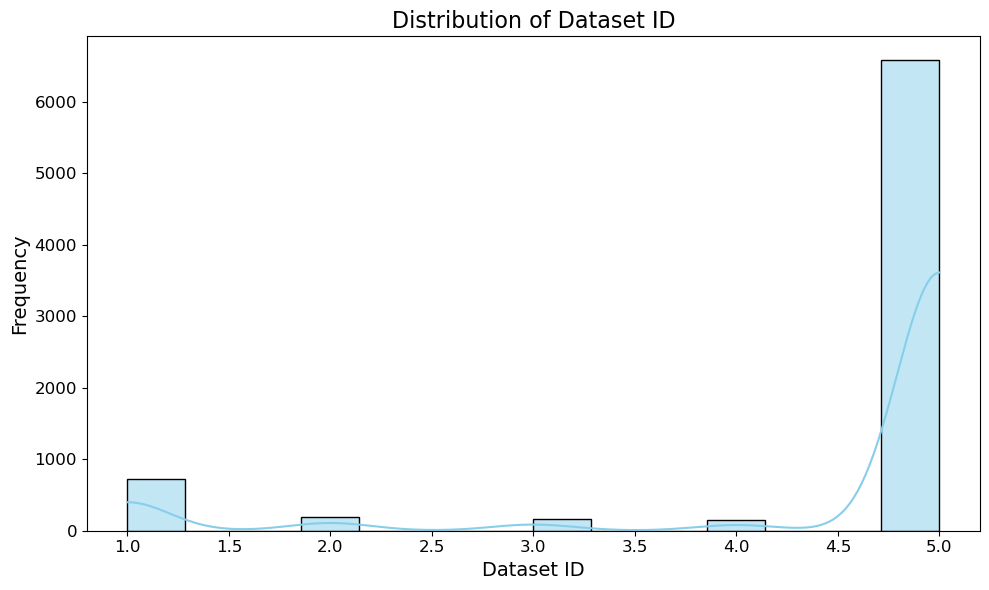

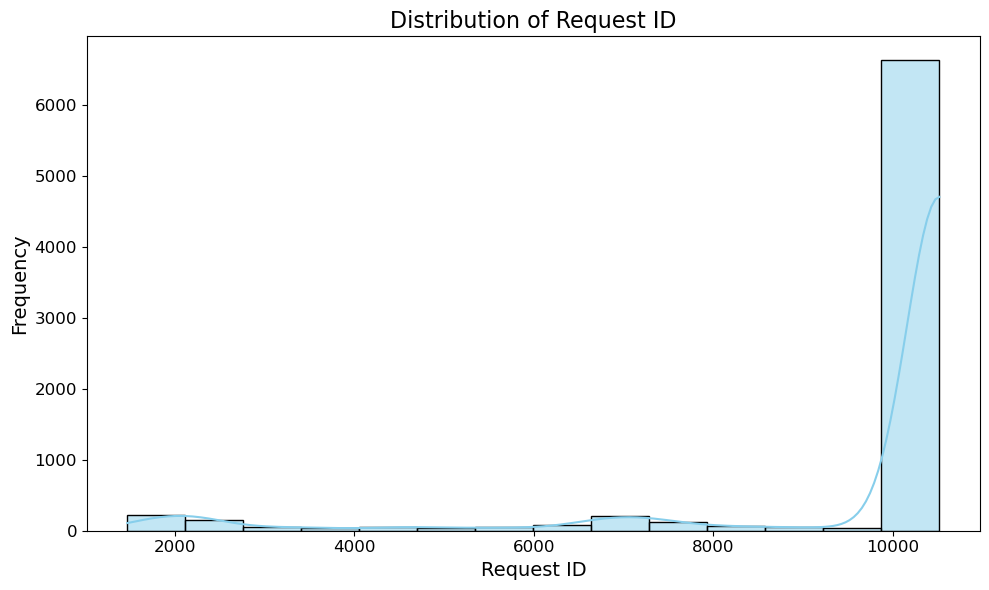

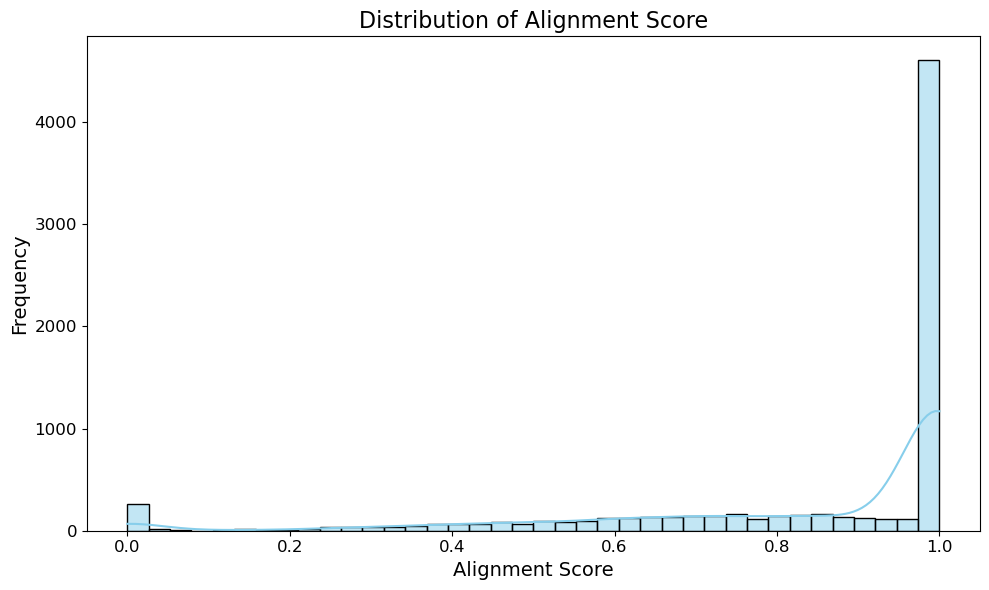

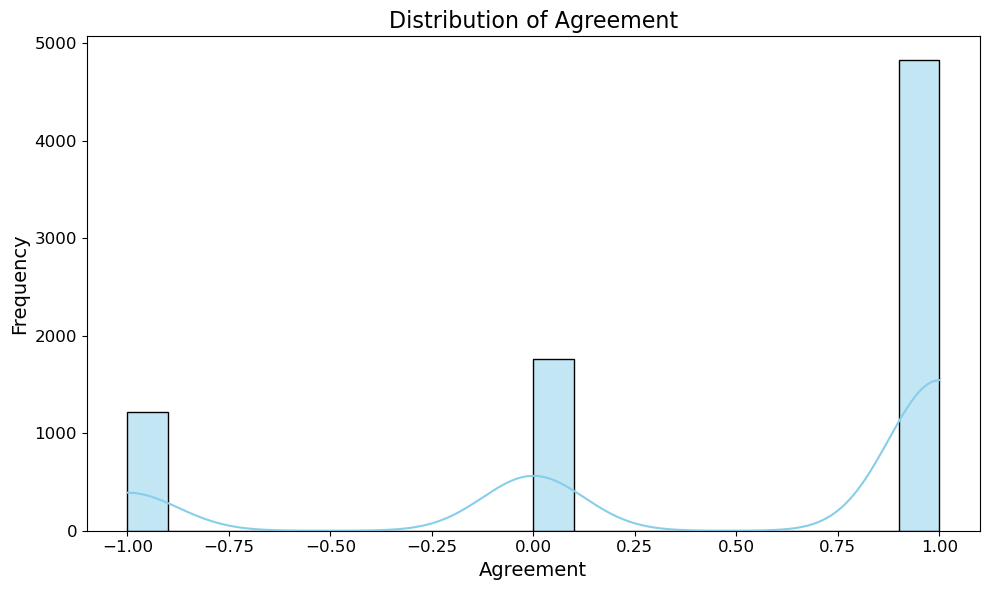

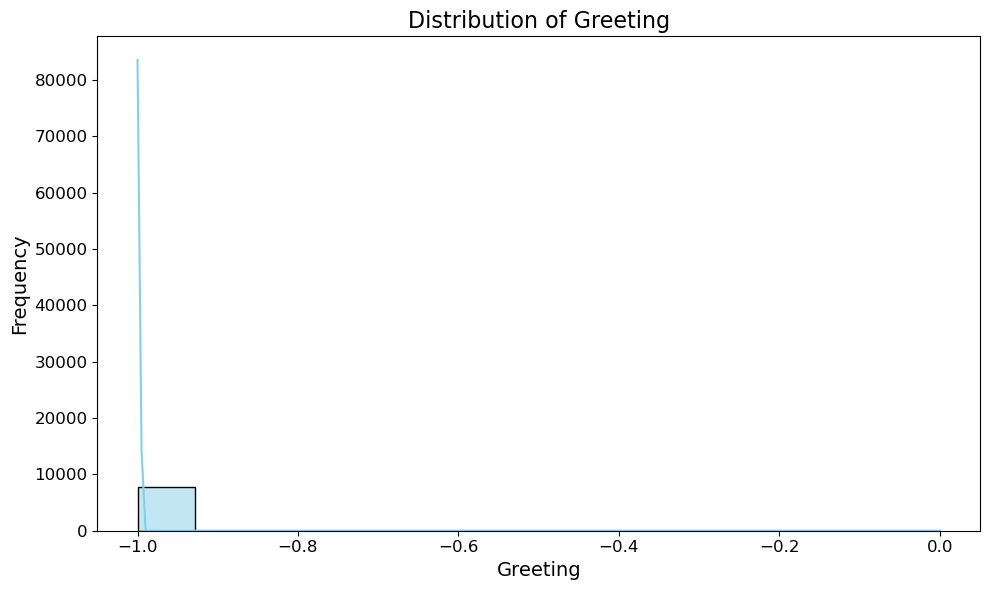

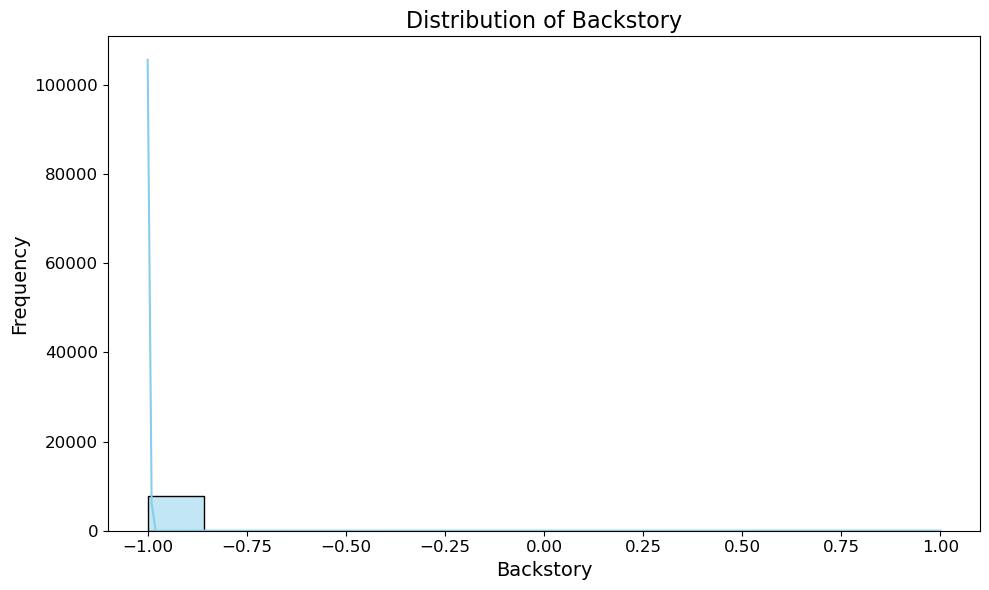

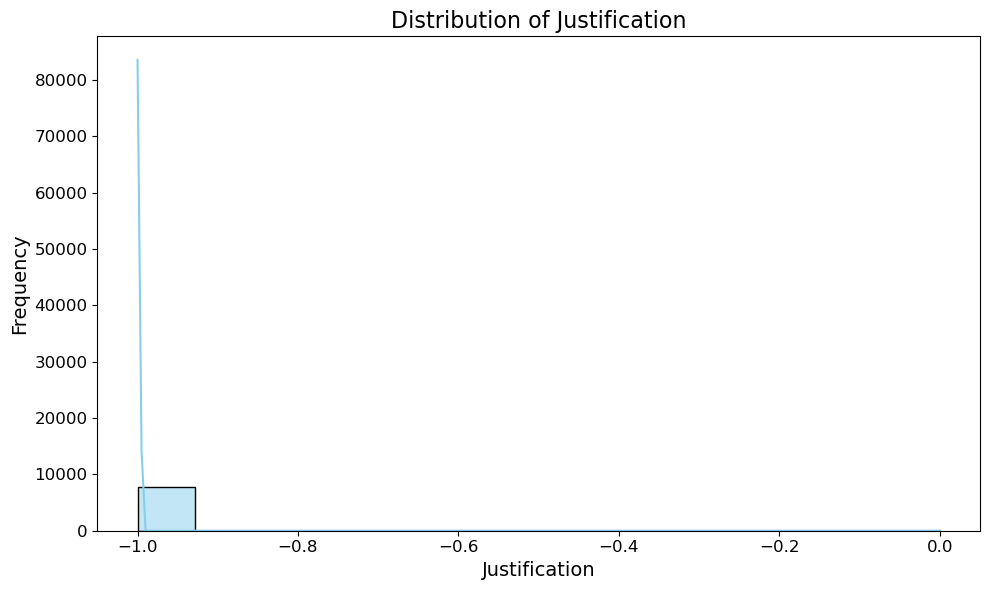

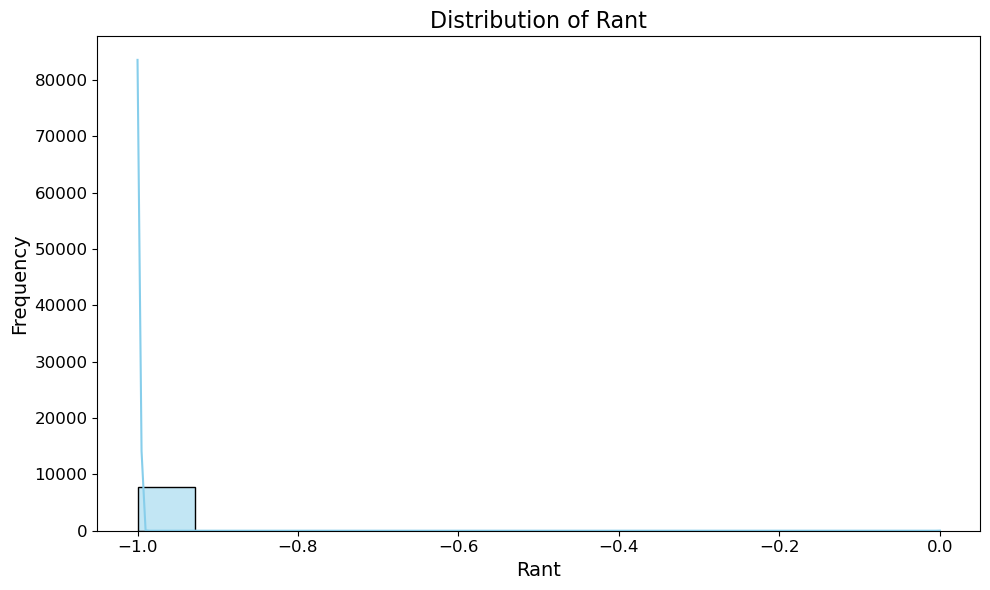

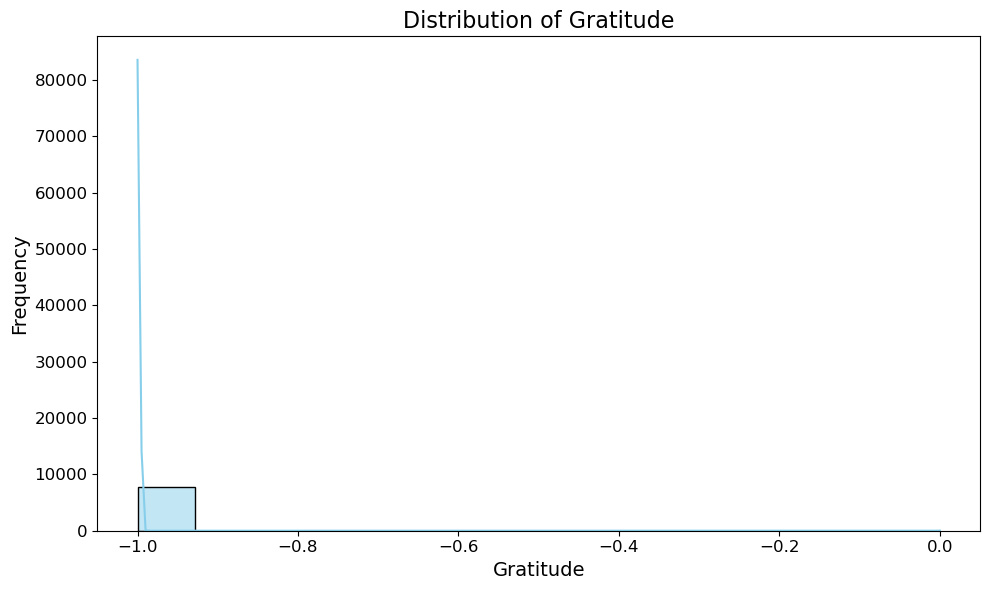

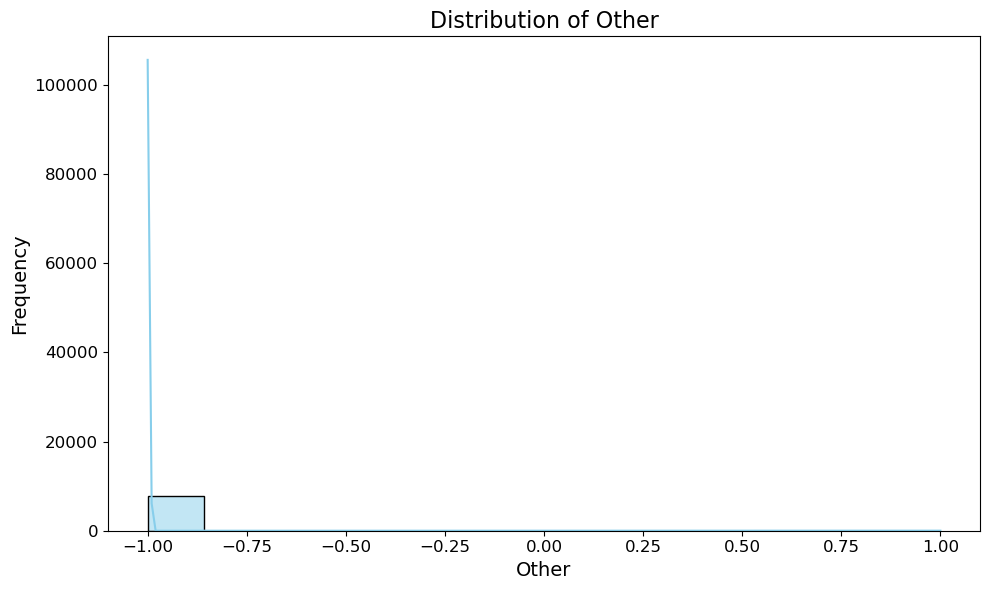

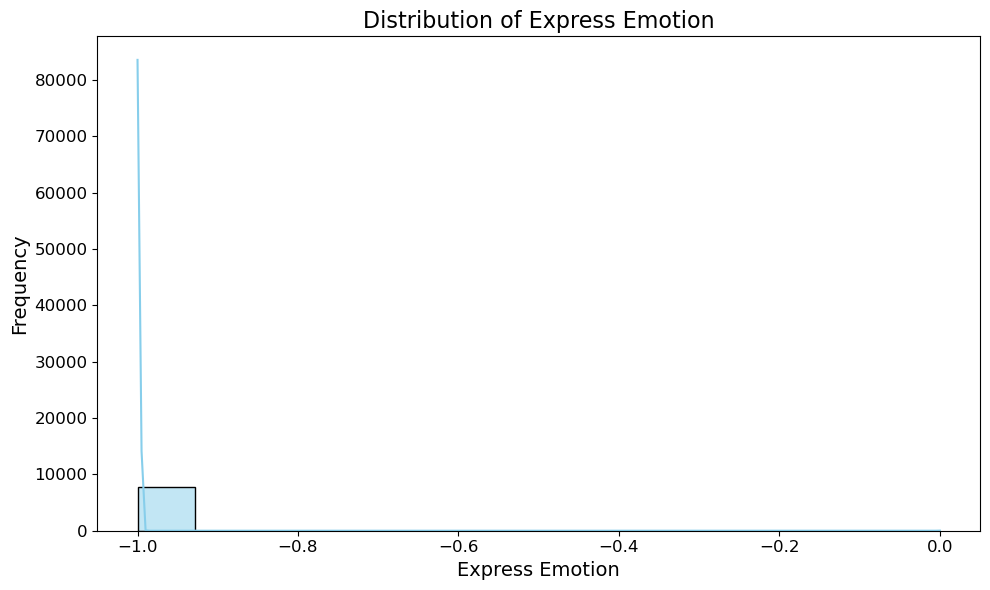

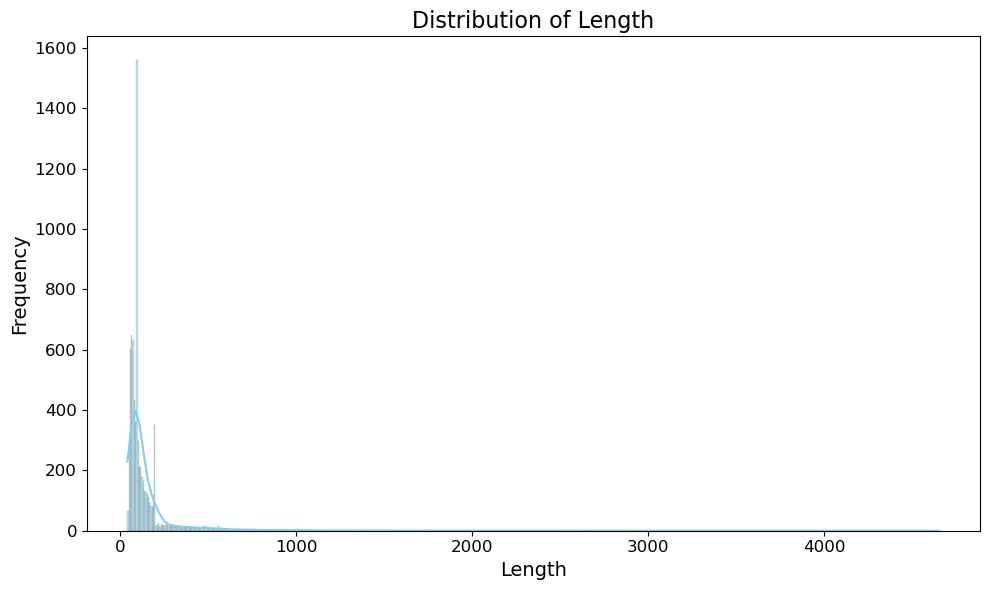

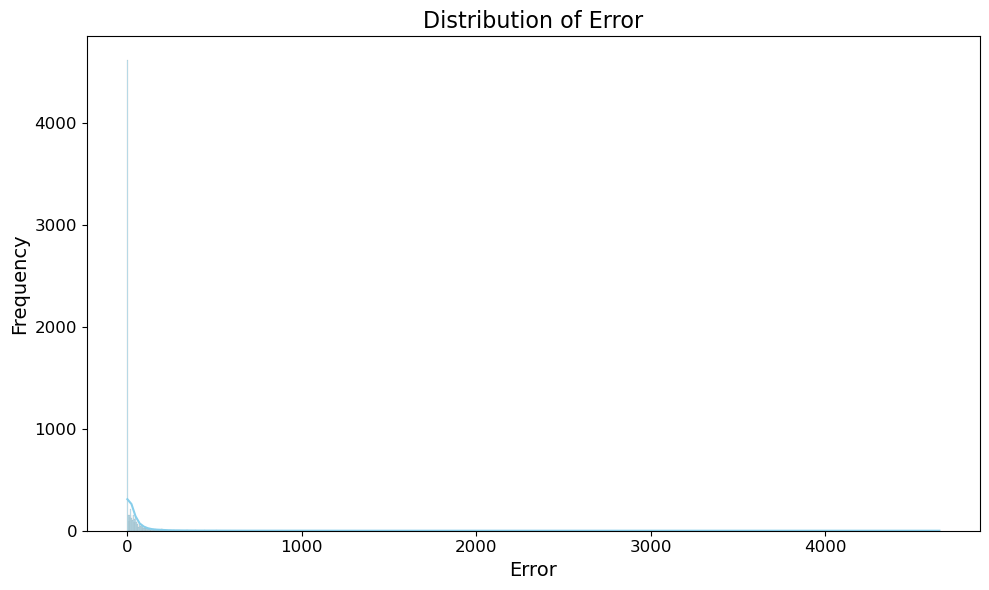

In [28]:
# Get all numerical columns
numerical_columns = selected_df_copy.select_dtypes(include=['int64', 'float64']).columns

# Plot histograms for numerical columns
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=selected_df_copy, x=column, kde=True, color='skyblue')
    plt.title(f'Distribution of {column}', fontsize=16)
    plt.xlabel(column, fontsize=14)
    plt.ylabel("Frequency", fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()


1. Dataset ID_y: Majority of the data falls within bins 1 and 38, with significant entries in bin 13 and bin 84.

2. Request ID: Similar to Dataset ID_y, most data points are concentrated in bins 1, 84, and 103.

3. Alignment Score: Entries are spread across various bins, with notable concentrations in bins 1, 16, 25, 30, 32, 34, 41, 42, 45, 52, 55, and 57.

4. Agreement: All data falls within a single bin (bin 1), indicating high agreement across the dataset.

5. Greeting: The majority of greetings fall within bin 1, with a smaller portion in bin 20.

6. Backstory: Predominantly concentrated in bin 1, indicating a low to moderate level of backstory usage across the dataset.



### Visualising Categorical columns

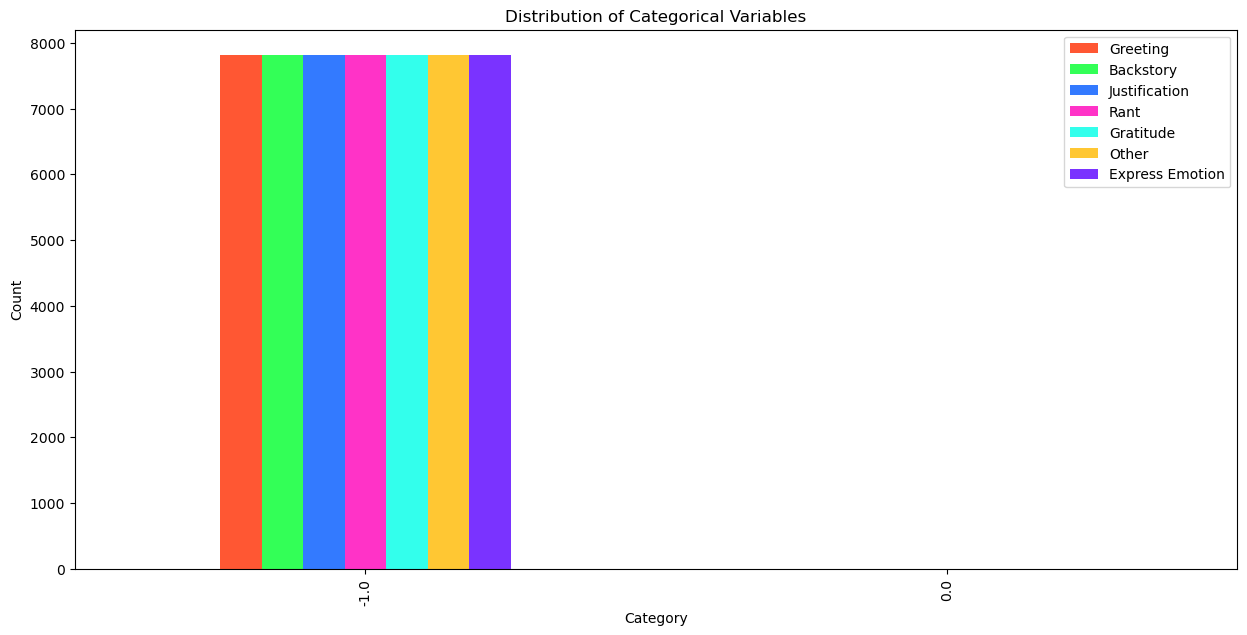

In [29]:
# List of categorical columns
categorical_columns = ['Greeting', 'Backstory', 'Justification', 'Rant', 'Gratitude', 'Other', 'Express Emotion']

# Create a new DataFrame to store the value counts of each column
value_counts_df = pd.DataFrame()

for column in categorical_columns:
    # Get the value counts of the column
    value_counts = selected_df_copy[column].value_counts()
    value_counts_df[column] = value_counts

# Define custom colors
custom_colors = ['#FF5733', '#33FF57', '#337AFF', '#FF33C7', '#33FFEC', '#FFC733', '#7A33FF']

# Create a bar plot with the custom colors
value_counts_df.plot(kind='bar', figsize=(15, 7), color=custom_colors)

plt.title('Distribution of Categorical Variables')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()



Value counts for Greeting:
0: 357,420
1: 48,120

Value counts for Backstory:
0: 280,380
1: 125,160

Value counts for Justification:
0: 401,220
1: 4,320

Value counts for Rant:
0: 387,960
1: 17,580

Value counts for Gratitude:
0: 374,460
1: 31,080

Value counts for Other:
0: 318,900
1: 86,640

Value counts for Express Emotion:
0: 398,340
1: 7,200



### Numerical vs Categorical Columns

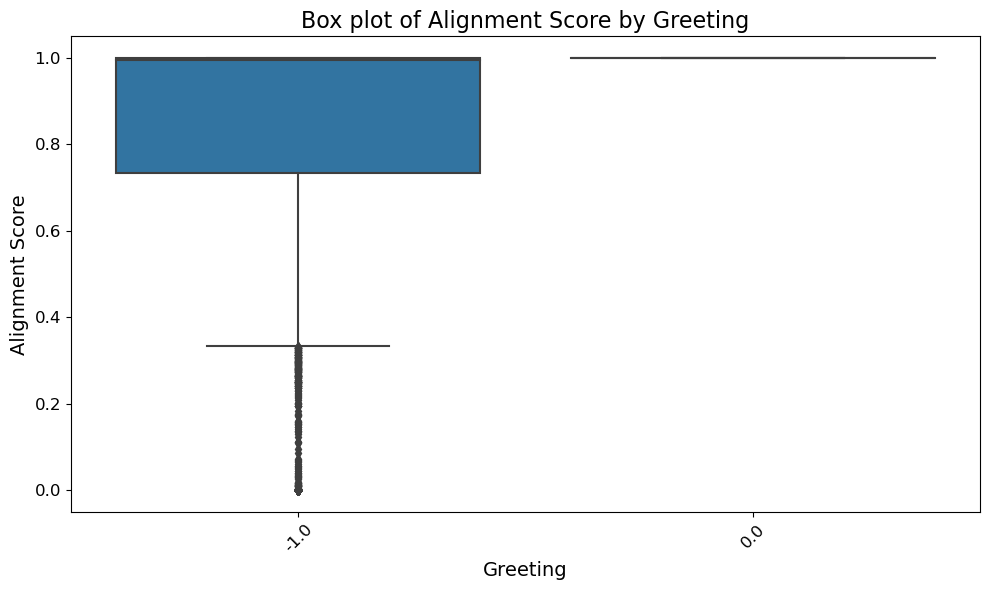

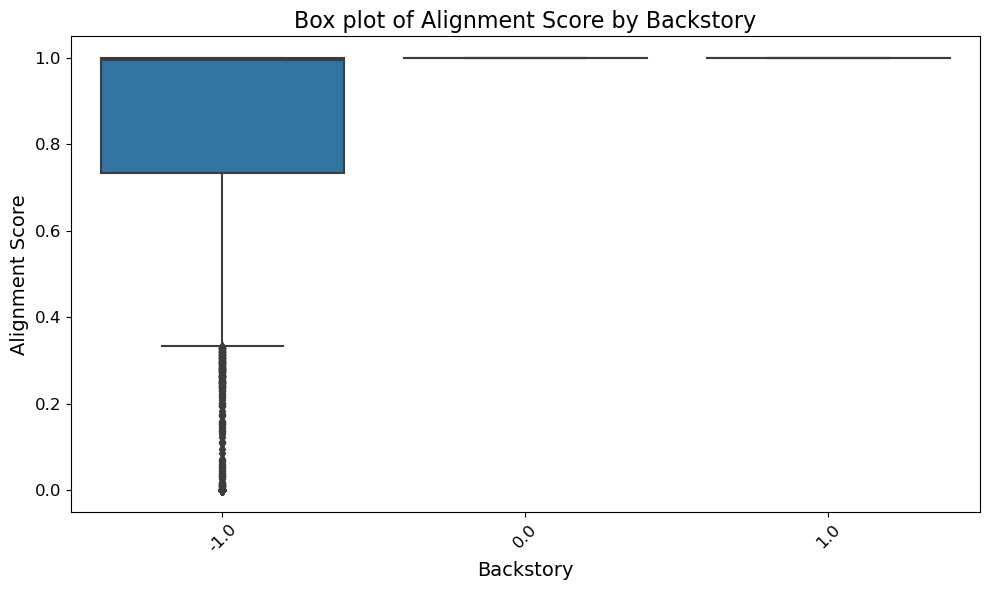

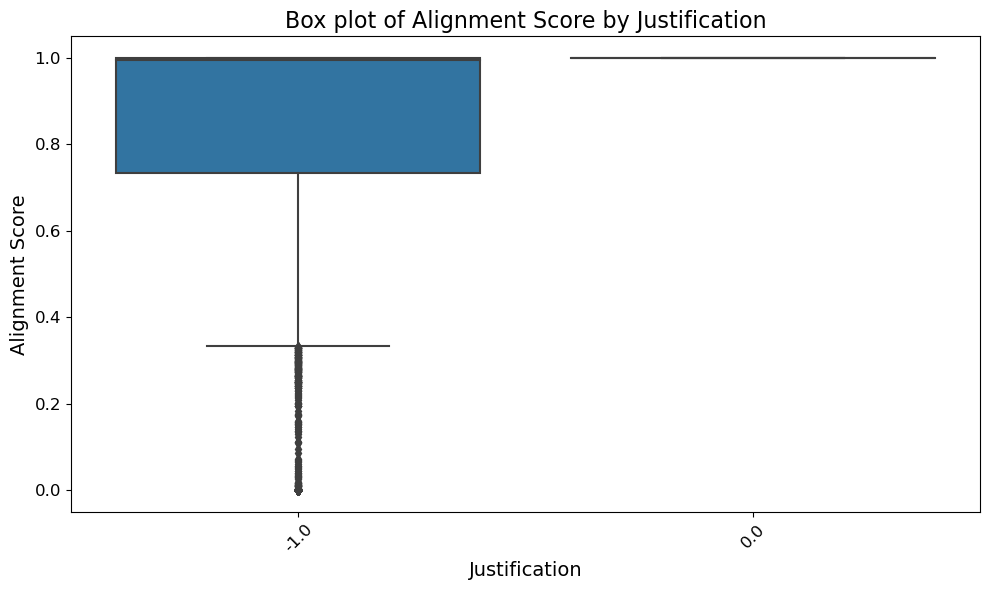

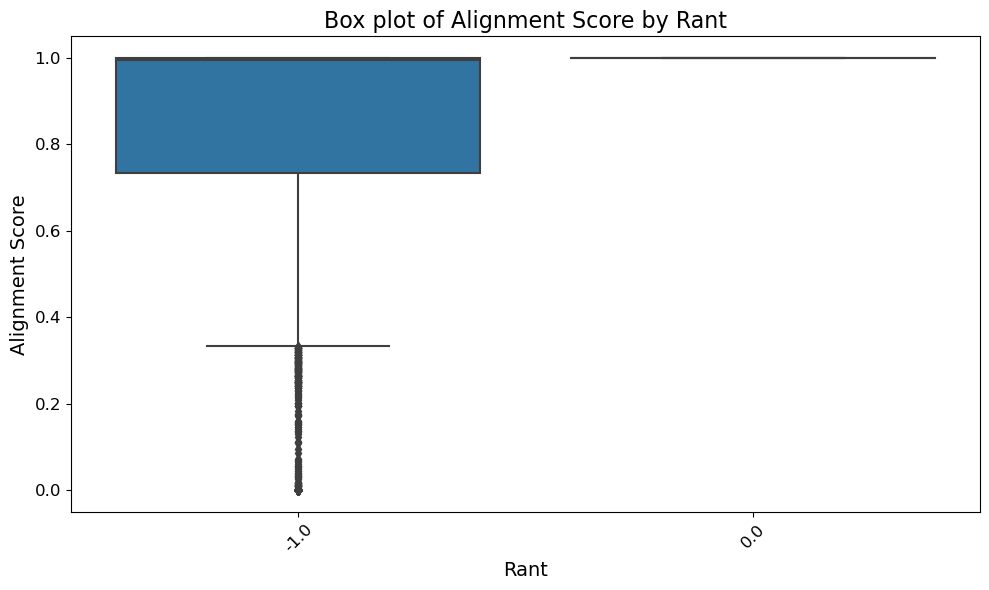

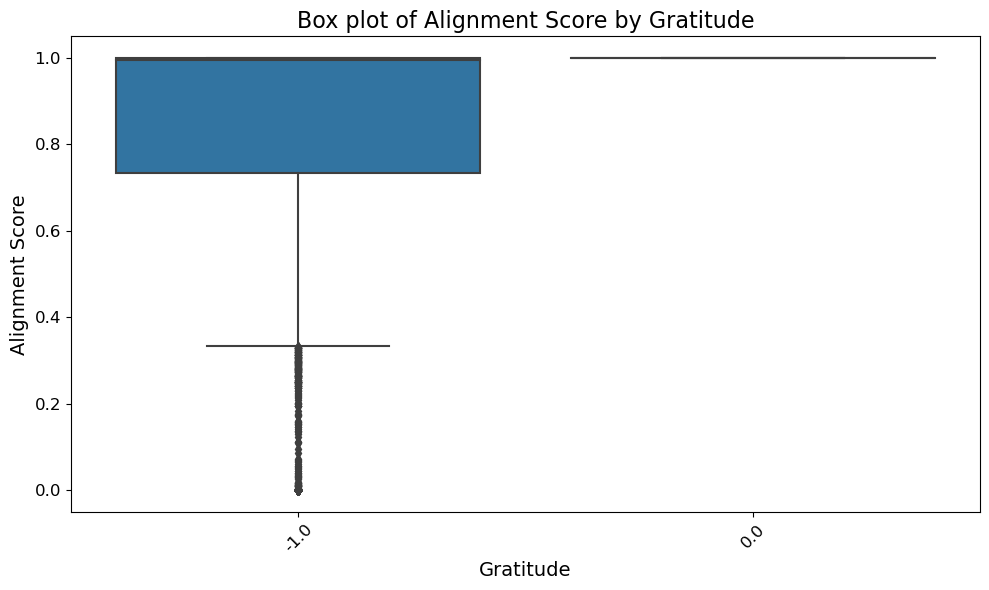

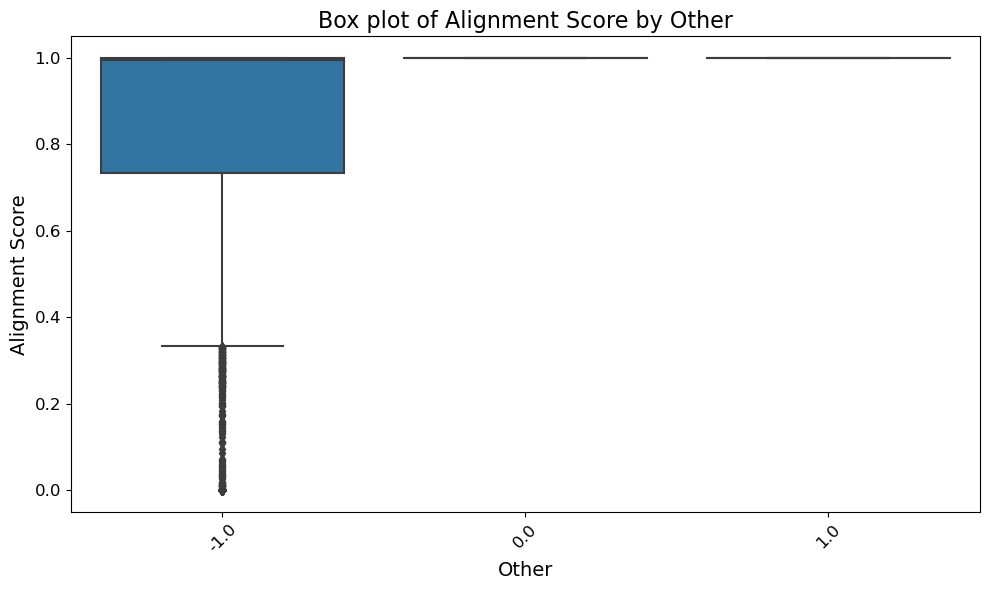

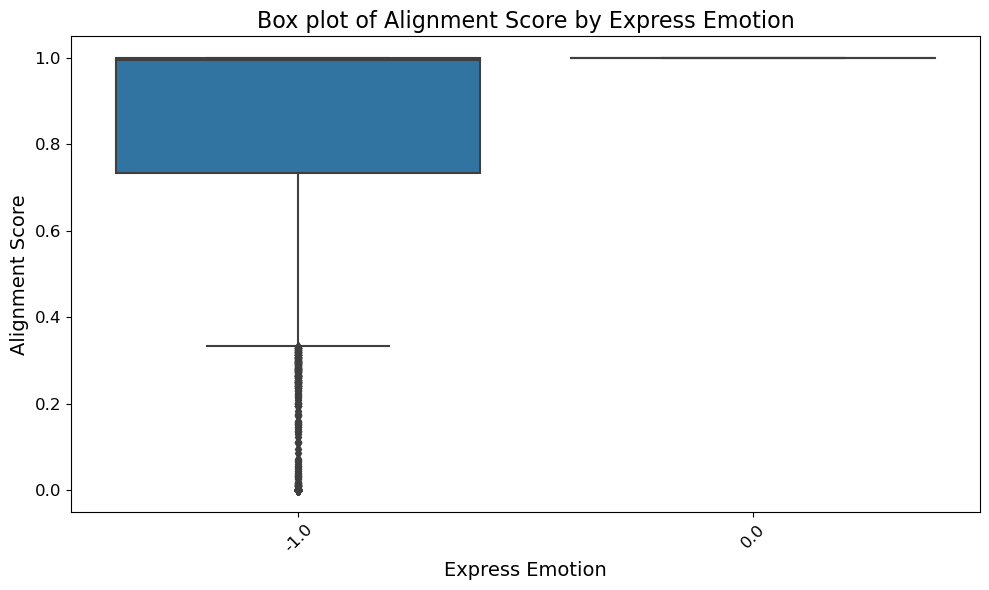

In [30]:
# Box plot for numerical columns by categorical variables
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=selected_df_copy, x=column, y='Alignment Score')
    plt.title(f'Box plot of Alignment Score by {column}', fontsize=16)
    plt.xlabel(column, fontsize=14)
    plt.ylabel("Alignment Score", fontsize=14)
    plt.xticks(fontsize=12, rotation=45)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()


While there are differences in the counts of observations across categories within each categorical variable, the distribution of alignment scores remains relatively consistent, with similar central tendencies and variability across different groups.



### Correlation heatmap for numerical columns

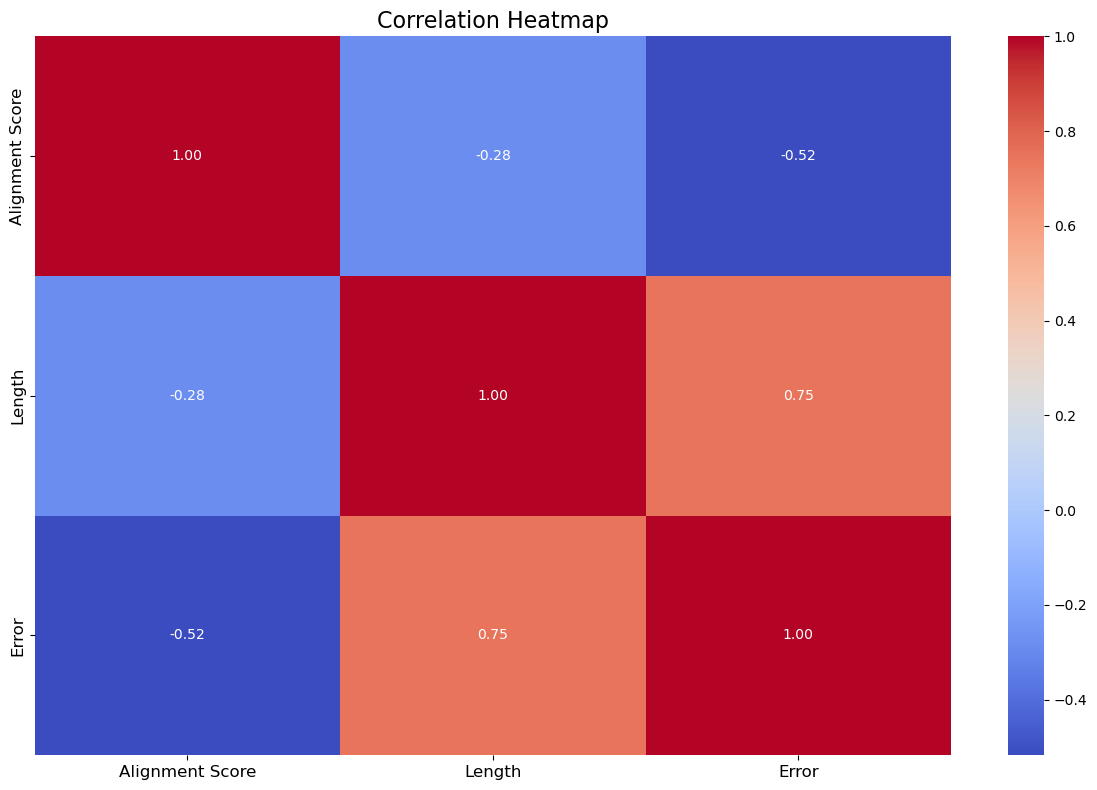

In [31]:
# Correlation heatmap for numerical columns
plt.figure(figsize=(12, 8))
sns.heatmap(selected_df_copy[['Alignment Score', 'Length', 'Error']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


1. Alignment Score vs. Length: Negative correlation of -0.293, indicating a slight decrease in alignment score as text length increases.

2. Alignment Score vs. Error: Strong negative correlation of -0.856, showing that higher errors correspond to lower alignment scores.

3. Length vs. Error:
Moderate positive correlation of 0.619, suggesting longer texts tend to have higher error rates.


### Correlation Analysis

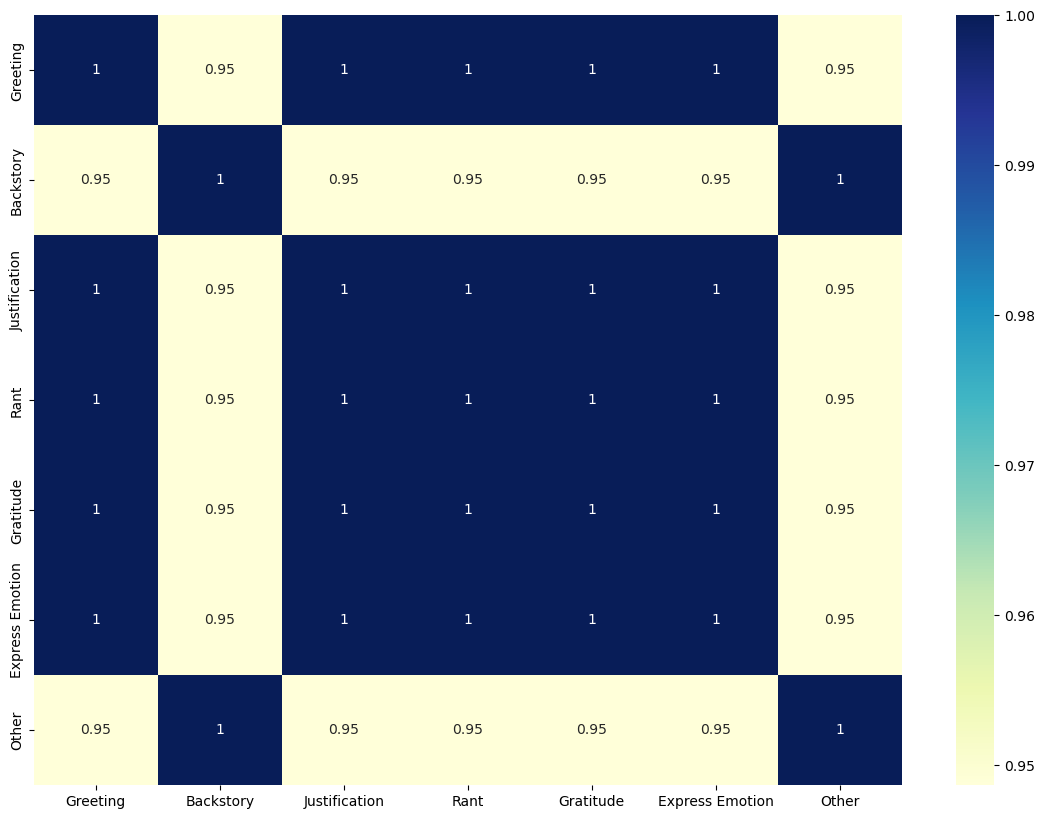

In [32]:
# Correlation Analysis between the different classes
plt.figure(figsize=(14, 10))
sns.heatmap(selected_df_copy[['Greeting', 'Backstory', 'Justification', 'Rant', 'Gratitude', 'Express Emotion', 'Other']].corr(), annot=True, cmap='YlGnBu')
plt.show()


1. The highest correlation coefficient is observed between 'Gratitude' and 'Greeting', with a value of approximately 0.24. This indicates a weak positive correlation between these two variables. It suggests that there might be some tendency for the presence of 'Greeting' to be associated with instances of 'Gratitude', but the relationship is not very strong.
2. The weakest correlation coefficients are observed for several pairs of variables, including:
'Express Emotion' and 'Justification' with a coefficient of approximately -0.003.
'Express Emotion' and 'Other' with a coefficient of approximately 0.006.
'Justification' and 'Backstory' with a coefficient of approximately -0.063.
These values indicate very weak correlations, close to zero, suggesting little to no linear relationship between these pairs of variables.